Predicting Salaries with Decision Trees
=======================================


![title](img/tree_5000_blank.png)

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree


In [2]:
attribute_names = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary-class',
)


Read a CSV data file.

In [4]:
df = pd.read_csv("adult.data",names = attribute_names, sep=',', engine='python')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Pre-process the data.  First, remove unwanted variables.

In [5]:
excludes = (
    'fnlwgt', 
    'education-num',
    'capital-gain', 
    'capital-loss'
)
for att in excludes:
    del df[att]
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


Boolean variables to 0s and 1s.

In [6]:
booleans = (
    'sex', 
    'native-country', 
    'salary-class'
)
for att in booleans:
    df[att] = df[att].astype('category')
    df[att] = df[att].cat.codes
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,39,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,39,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,39,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,5,0


 One-hot encoding of all categorical attributes.

In [8]:
categoricals = (
    'workclass', 
    'education', 
    'marital-status', 
    'occupation', 
    'relationship', 
    'race'
)
for att in categoricals:
    df = pd.concat([df,pd.get_dummies(df[att], prefix = att)], axis = 1)
    del df[att]

Extract attributes (X) and class labels (y).

In [9]:
y =df['salary-class']

In [10]:
X= df.copy()
X = X.drop(columns = 'salary-class') 

Split dataset into training and testing subsets.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state = 34)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)



X_train (21815, 62)
X_test (10746, 62)
y_train (21815,)
y_test (10746,)


Construct a decision tree from this training data.

In [13]:
clf = DecisionTreeClassifier(random_state= 34,criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=34)

Predict target class for the training set.

In [15]:
y_train_pred = clf.predict(X_train)
print(y_train_pred[0:10])
train_acc = accuracy_score(y_train, y_train_pred)
print("train:",train_acc)

[0 0 0 1 0 1 0 0 0 0]
train: 0.974421269768508


Predict target class for the testing set.

In [16]:
y_test_pred = clf.predict(X_test)
print(y_test_pred[0:10])
test_acc = accuracy_score(y_test, y_test_pred)
print("test:",test_acc)

[1 0 1 0 1 0 0 0 0 0]
test: 0.7734971152056579


Check if dataset is balanced.

In [17]:
df['salary-class'].value_counts()

0    24720
1     7841
Name: salary-class, dtype: int64

Prune the decision tree.

samples 2
train: 0.974421269768508
test: 0.7734971152056579
samples 3
train: 0.9610359844143938
test: 0.7777777777777778
samples 5
train: 0.9457254182901673
test: 0.7800111669458403
samples 10
train: 0.9211093284437314
test: 0.7904336497301322
samples 20
train: 0.8956222782489113
test: 0.7997394379303927
samples 50
train: 0.8671097868439147
test: 0.8173273776288852
samples 100
train: 0.8559706623882649
test: 0.8207705192629816
samples 250
train: 0.8452440980976392
test: 0.818537130094919
samples 500
train: 0.8354343341737337
test: 0.8184440722129165
samples 750
train: 0.8334173733669493
test: 0.8177926670388982
samples 1000
train: 0.830575292230117
test: 0.8179787828029034
samples 2500
train: 0.8262204904881962
test: 0.8172343197468825
samples 5000
train: 0.8230575292230117
test: 0.8158384515168434
samples 10000
train: 0.762181984872794
test: 0.7531174390470873
samples 15000
train: 0.762181984872794
test: 0.7531174390470873


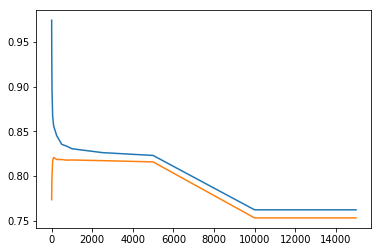

In [20]:
sizes = [2,3,5,10,20,50,100,250,500,750,1000,2500,5000,10000,15000]
train_accs = []
test_accs = []

for s in sizes:
    clf = DecisionTreeClassifier(random_state= 34,criterion='entropy', min_samples_split= s)
    clf.fit(X_train, y_train)
    
    print('samples',s)
    y_train_pred = clf.predict(X_train)
    #print(y_train_pred[0:10])
    train_acc = accuracy_score(y_train, y_train_pred)
    print("train:",train_acc)
    
    y_test_pred = clf.predict(X_test)
    #print(y_test_pred[0:10])
    test_acc = accuracy_score(y_test, y_test_pred)
    print("test:",test_acc)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
plt.plot(sizes,train_accs)
plt.plot(sizes,test_accs)
plt.show()

Graphical representation of a decision tree.

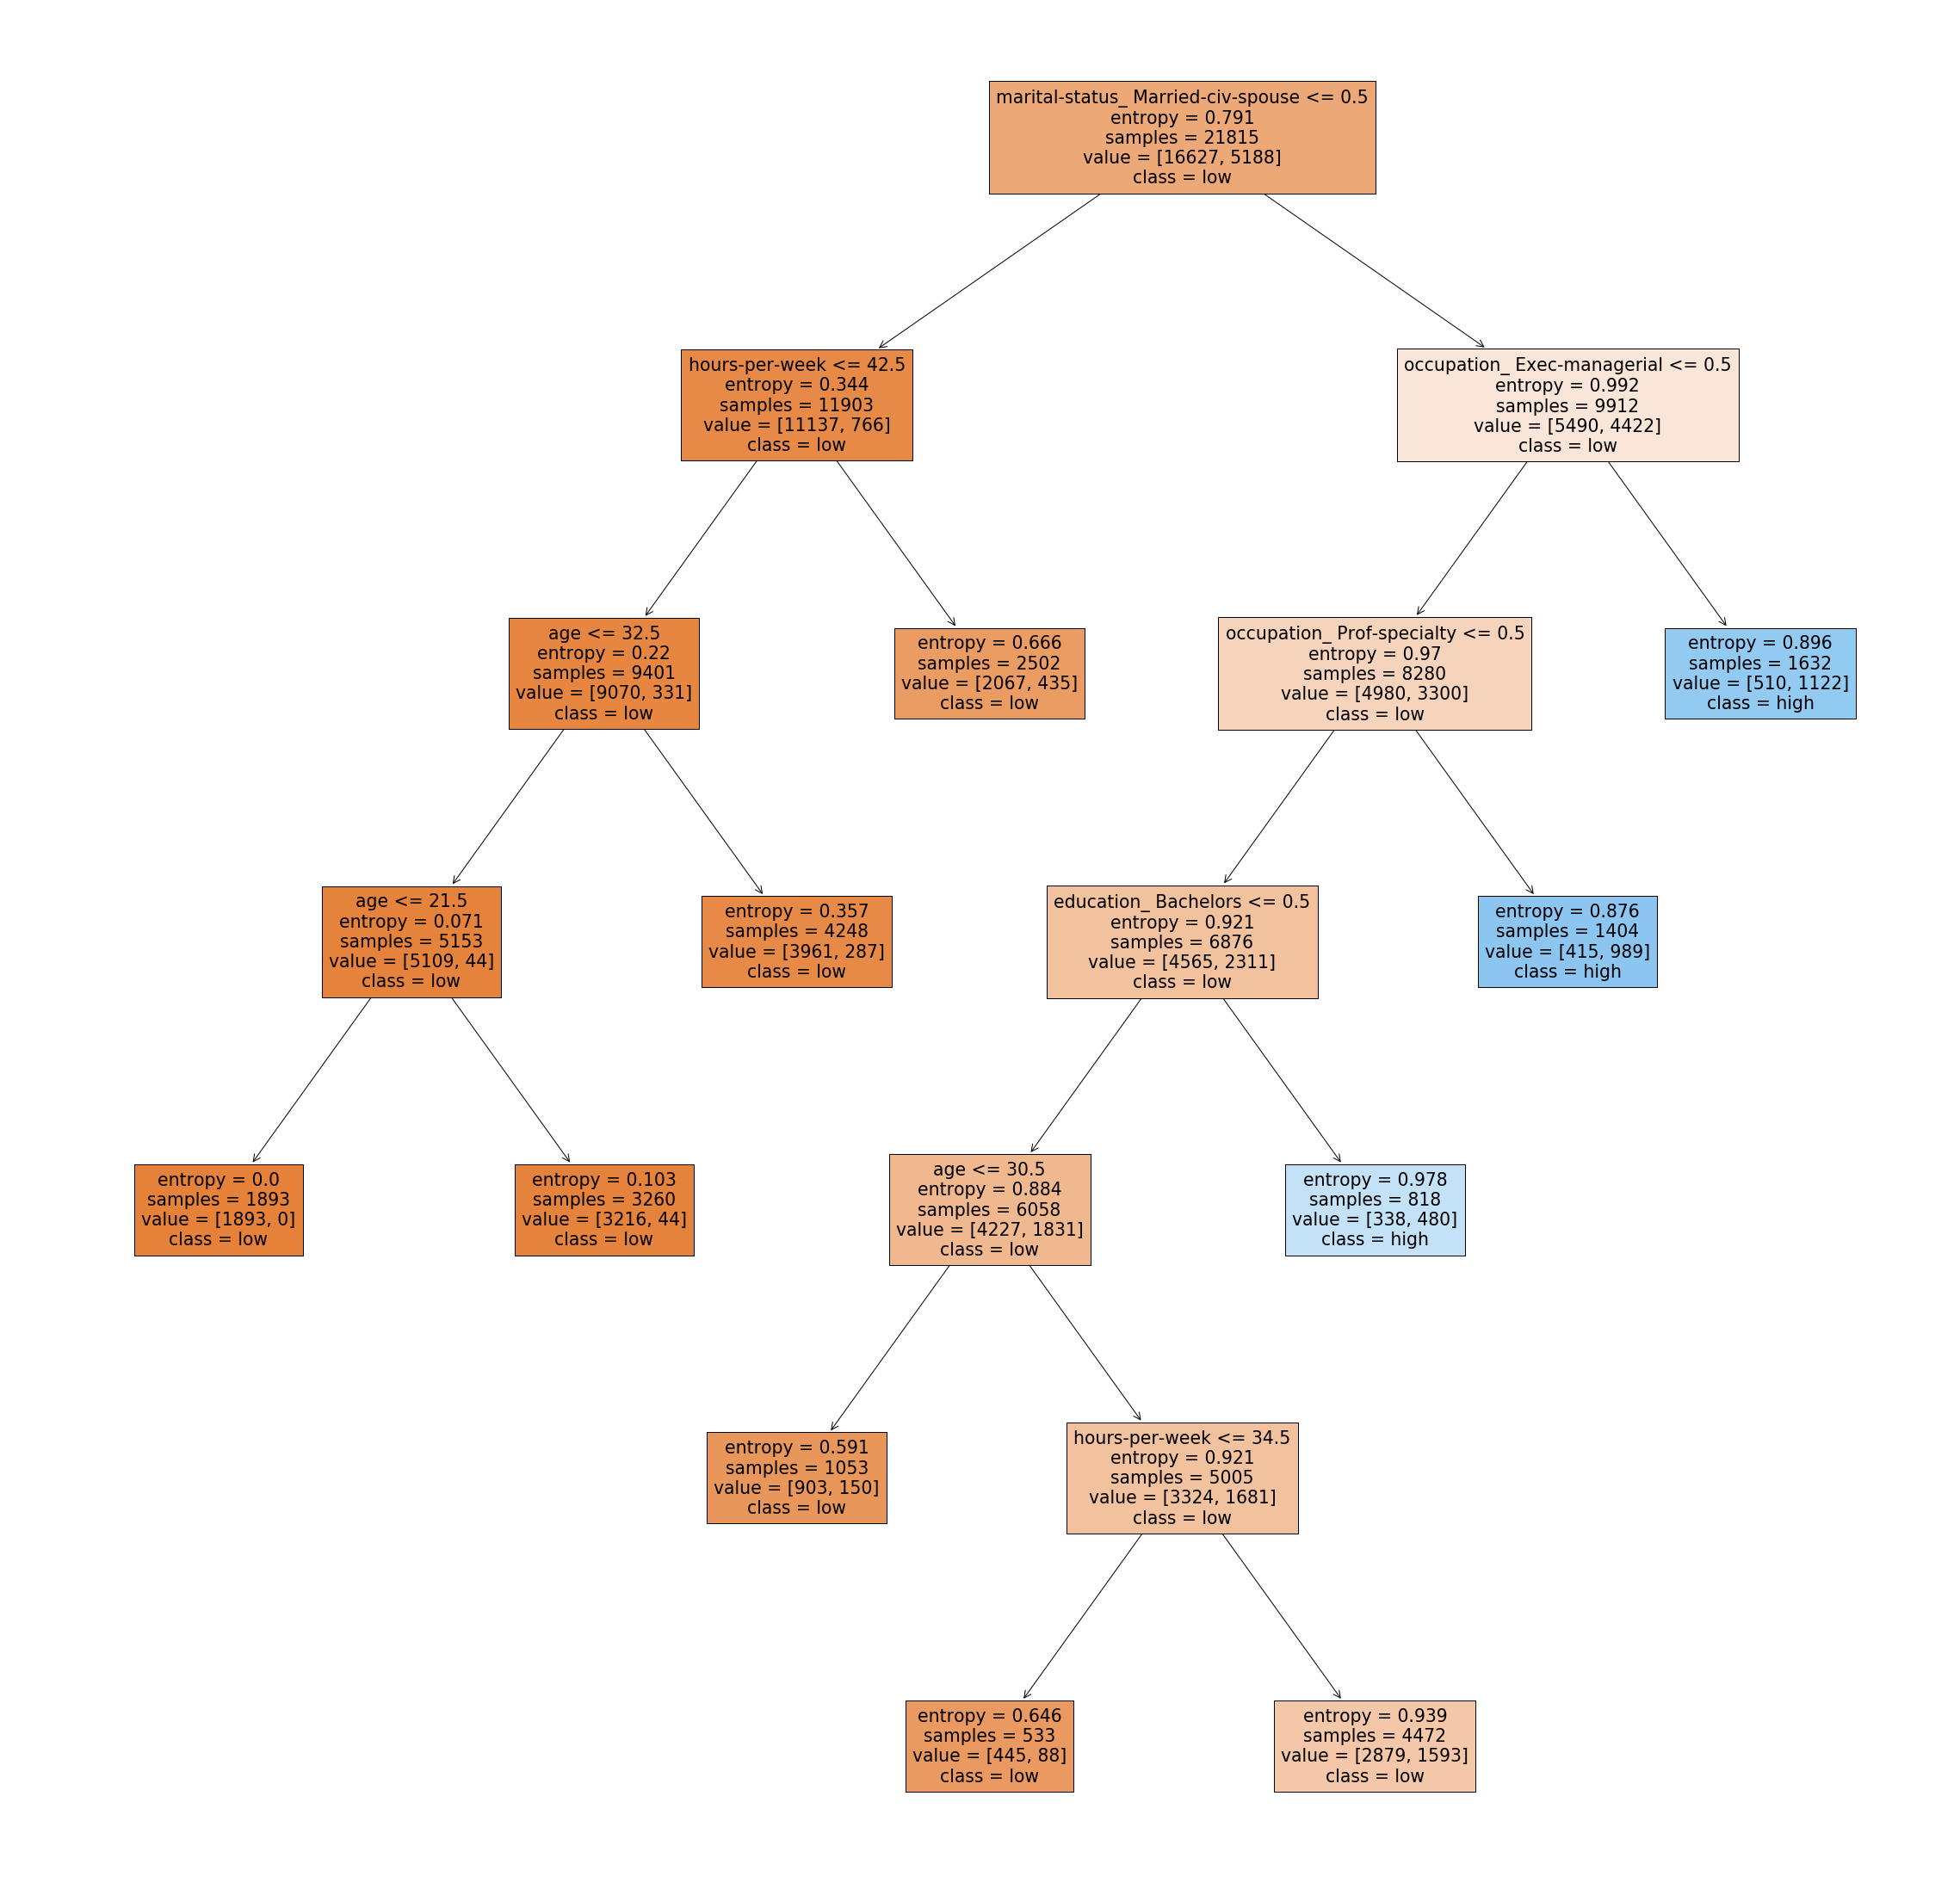

In [22]:
clf = DecisionTreeClassifier(min_samples_split= 5000,criterion= 'entropy', random_state= 34)
clf.fit(X_train, y_train)

fig= plt.figure(figsize=(40,40))
p = tree.plot_tree(clf,filled = True,feature_names= X_train.columns.to_list(),class_names=("low","high")
                  )
fig.savefig("tree.png")